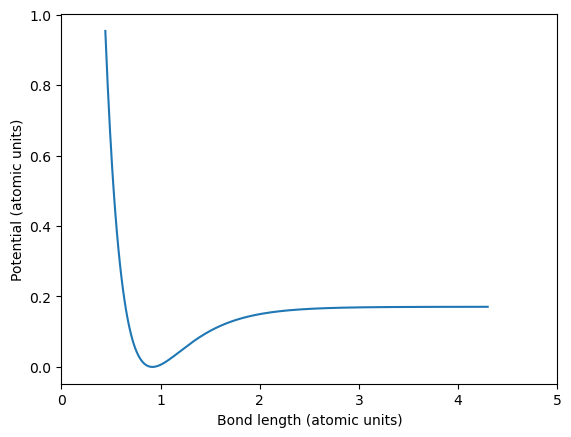

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from morse import Morse, FAC


# Atom masses in atomic mass units
mH, mF = 1., 19.
#mH, mF = 1.0, 23.985041689

# Equilibrium bondlength in meters
#re = 0.915801e-10
#re = 2.0168266478525405e-10
#re = 1.6919628184820623e-10
re = 0.9178507603174318e-10


# potential energy at minimum, ok to set at zero
Te = 0 # -43842320.8199833

# Morse parameters in wavenumbers
#we, wexe = 4196.112054123941, 108.50866999528301
#we, wexe = 1158.10509247255, 2.1995232601745265
#we, wexe = 1596.554641682938, 6.057121790954471
we, wexe = 4165.159189298829, 115.74814358623065

# create Morse object
X = Morse(mH, mF, we, wexe, re, Te)

# create Morse grid - will make grids in SI (self.r) and atomic units (self.r_au)
X.make_rgrid()

# create Morse potential on SI grid, will make potential in SI (self.V) and atomic units (self.V_au)
X.V = X.Vmorse(X.r)

# plot Morse potential in atomic units
plt.plot(X.r_au  * 0.529, X.V_au)
plt.xlabel("Bond length (atomic units)")
plt.ylabel("Potential (atomic units)")
plt.xlim(0, 5)
plt.show()

Norm in au is 1.0
Norm in si is 1.0000000000000002


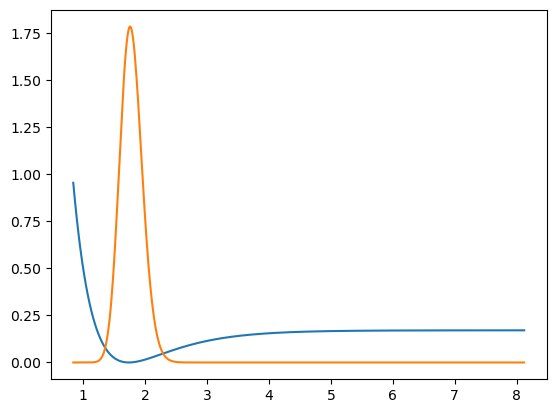

In [2]:
# calculate an eigenstate of the Morse oscillator
# self.psi_si will be normalized in SI units
# self.psi_au will be normalized in atomic units

# calculate psi_20
psi = X.calc_psi_z(0)

# check normalization in SI units
norm_si = np.trapz(X.psi_si ** 2, X.r)

# check normalization in atomic units
norm_au = np.trapz(X.psi_au ** 2,  X.r_au)
print(F'Norm in au is {norm_au}')
print(F'Norm in si is {norm_si}')

# plot the normalized eigenfunction in atomic units against the potential in atomic units
plt.plot(X.r_au, X.V_au)
plt.plot(X.r_au, X.psi_au)
#plt.plot(X.r_au, X.r_au-X.r_eq_au)
plt.show()

In [11]:
casci_pes = np.array(
[1.39845106e-01, 1.23685740e-01, 1.09023141e-01, 9.57444763e-02,
 8.37439140e-02, 7.29220331e-02, 6.31854883e-02, 5.44469379e-02,
 4.66251233e-02, 3.96449350e-02, 3.34373292e-02, 2.79390511e-02,
 2.30922027e-02, 1.88437343e-02, 1.51449316e-02, 1.19509444e-02,
 9.22037730e-03, 6.91494363e-03, 4.99917327e-03, 3.44016503e-03,
 2.20737331e-03, 1.27242131e-03, 6.08935175e-04, 1.92395018e-04,
 0.00000000e+00, 1.05453045e-05, 2.04309938e-04, 5.62953749e-04,
 1.06942310e-03, 1.70786424e-03, 2.46354375e-03, 3.32277548e-03,
 4.27285327e-03, 5.30198911e-03, 6.39925621e-03, 7.55453634e-03,
 8.75847117e-03, 1.00024174e-02, 1.12784049e-02, 1.25790976e-02,
 1.38977577e-02, 1.52282108e-02, 1.65648146e-02, 1.79024285e-02,
 1.92363845e-02, 2.05624608e-02, 2.18768551e-02, 2.31761601e-02,
 2.44573398e-02, 2.57177064e-02, 2.69548983e-02, 2.81668588e-02,
 2.93518158e-02, 3.05082619e-02, 3.16349353e-02, 3.27308017e-02,
 3.37950366e-02, 3.48270083e-02, 3.58262624e-02, 3.67925055e-02,
 3.77255913e-02, 3.86255064e-02, 3.94923575e-02, 4.03263586e-02,
 4.11278200e-02, 4.18971367e-02, 4.26347790e-02, 4.33412824e-02,
 4.40172397e-02, 4.46632916e-02, 4.52801204e-02, 4.58684425e-02,
 4.64290024e-02, 4.69625663e-02, 4.74699177e-02, 4.79518522e-02,
 4.84091727e-02, 4.88426861e-02, 4.92531997e-02, 4.96415175e-02,
 5.00084381e-02, 5.03547520e-02, 5.06812391e-02, 5.09886672e-02,
 5.12777901e-02, 5.15493464e-02, 5.18040584e-02, 5.20426310e-02,
 5.22657506e-02, 5.24740856e-02, 5.26682843e-02, 5.28489765e-02,
 5.30167717e-02, 5.31722602e-02, 5.33160124e-02, 5.34485795e-02,
 5.35704934e-02, 5.36822670e-02, 5.37843948e-02, 5.38773531e-02])

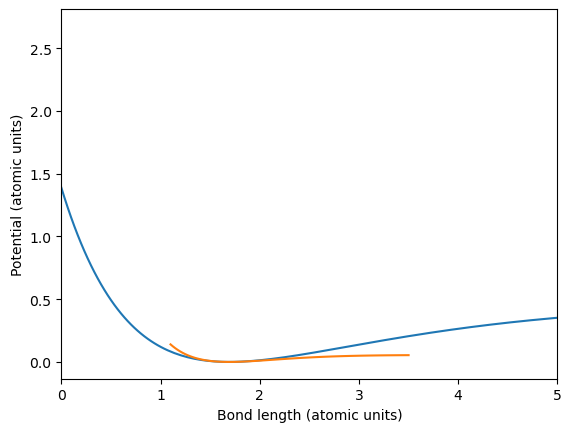

In [13]:
rs = np.linspace(1.1, 3.5, 100)
# plot Morse potential in atomic units
plt.plot(X.r_au  * 0.529, X.V_au)
plt.plot(rs, casci_pes)
plt.xlabel("Bond length (atomic units)")
plt.ylabel("Potential (atomic units)")
plt.xlim(0, 5)
plt.show()

Recall the three coupled Hamiltonians:
p dot A Hamiltonian,
\begin{equation}
    \hat{H}_{\rm p \cdot A} = \frac{\hat{p}^2}{2m} + V(\hat{x})  + \hbar \omega \hat{b}^{\dagger} \hat{b} -  \frac{z}{m} \hat{p} \cdot  {\bf A}_0 ( \hat{b}^{\dagger} + \hat{b}) + \frac{z^2}{2m}  {\bf A}_0^2 ( \hat{b}^{\dagger} + \hat{b})^2,
\end{equation}
the d dot E Hamiltonian,
\begin{equation}
    \hat{H}_{\rm d \cdot E} = \frac{\hat{p}^2}{2m} + V(\hat{x}) + \hbar \omega \hat{b}^{\dagger} \hat{b} + i\omega \hat{\mu} \cdot {\bf A}_0 ( \hat{b}^{\dagger} - \hat{b}) +\frac{\omega_{{\rm cav}}}{\hbar} ( \hat{\mu} \cdot {\bf A}_0)^2
\end{equation}
or the Pauli-Fierz (PF) Hamiltonian,
\begin{equation}
    \hat{H}_{\rm d \cdot E} = \frac{\hat{p}^2}{2m}+ V(\hat{x}) + \hbar \omega \hat{b}^{\dagger} \hat{b} - \omega \hat{\mu} \cdot {\bf A}_0 ( \hat{b}^{\dagger} + \hat{b}) +\frac{\omega_{{\rm cav}}}{\hbar} ( \hat{\mu} \cdot {\bf A}_0)^2
\end{equation}

The matter Hamiltonian terms $\frac{\hat{p}^2}{2m} + V(\hat{x})$ have been solved by either our Morse, quartic perturbation, or finite difference approach and our photon Hamiltonian term $\hbar \omega \hat{b}^{\dagger} \hat{b}$ is also already known.  We need to evaluate
the additional coupling elements.  For the d.E and PF Hamiltonians, the coupling elements will involve matter matrix elements with of the form
\begin{equation}
\langle \psi_i | \hat{\mu} | \psi_f \rangle = z \langle \psi_i | \hat{x} | \psi_f \rangle
\end{equation}
and the p.A Hamiltonian will have matrix elements of the form
\begin{equation}
\langle \psi_i | \hat{p} | \psi_f \rangle = i m \left(E_i - E_f \right) \langle \psi_i | \hat{x} | \psi_f \rangle
\end{equation}
where $E_n$ is the energy associated with matter state $n$, $m$ is the reduced mass, and $i$ is the imaginary unit.  Hence, we need to be able to compute matrix elements of the position operator with our matter states.  The following function will accomplish this.


In [ ]:
def position_matrix_element(instance, i, j):
    """ A function to compute position matrix elements between states i and j using grid x

    Arguments
    ---------
    instance : class instance
        the instance of the class you want to use for the states

    i : int
        index of bra state

    j : int
        index of ket state

    Returns
    -------
    x_ij : float
        the matrix element <i | x | j>

    """
    instance.calc_psi_z(i)
    psi_i = instance.psi_au
    instance.calc_psi_z(j)
    psi_j = instance.psi_au
    integrand = psi_i * (instance.r_au - instance.r_eq_au) * psi_j
    x_ij = np.trapz(integrand, instance.r_au)
    return x_ij


x_01 = position_matrix_element(X, 0, 1)
x_02 = position_matrix_element(X, 0, 2)

print(x_00)
print(x_02)


dipole_au = -0.8113388
q_au = dipole_au / X.r_eq_au
print(q_au)

0.03020945496467519
-0.01451584458490009
-0.4688158269027078
